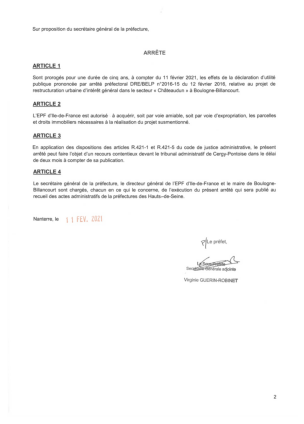


Loader
low_threshold = (0, 0, 250)
high_threshold = (255, 255, 255)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0 255]


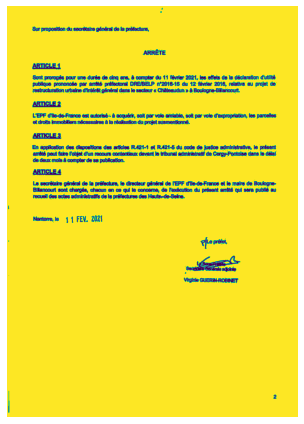


Extractor
outlier_weight = 3
outlier_bias = 100
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 15
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.

[  0 255]


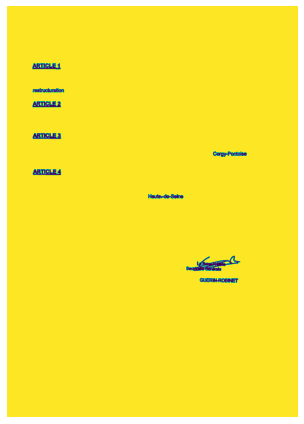


Cropper
min_region_size = 10000
border_ratio = 0.1

[  0 255]


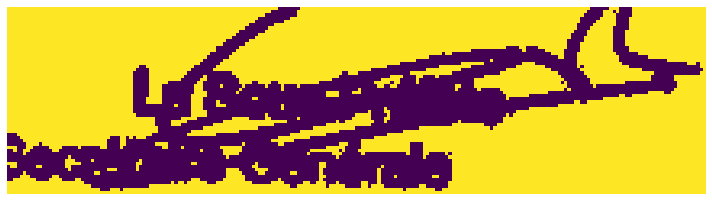


Judger
size_ratio = [1, 4]
pixel_ratio = [0.01, 1]



False

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from signature_detect.loader import Loader
from signature_detect.extractor import Extractor
from signature_detect.cropper import Cropper
from signature_detect.judger import Judger
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
path = "sign2.jpeg"
image = cv2.imread("sign2.jpeg")
show_image(image)
loader = Loader()
print(loader)
mask = loader.get_masks(path)[0]
print(mask)
print(np.unique(mask))
show_image(mask)
extractor = Extractor(amplfier=15)
print(extractor)
labeled_mask = extractor.extract(mask)
print(np.unique(labeled_mask))
show_image(labeled_mask)
cropper = Cropper()
print(cropper)
results = cropper.run(labeled_mask)
signature = results[0]["cropped_mask"]
print(np.unique(signature))
show_image(signature)
judger = Judger()
print(judger)
result = judger.judge(labeled_mask)
result